## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Model
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [ ]:
from google.colab import files
print("Upload Kaggle API")
files.upload()

Upload Kaggle API


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajarshiray25","key":"7c8ca4820f610ff936d3901bf0a945da"}'}

In [ ]:
%%bash

mkdir -p ~/.kaggle
cp kaggle.json ~/.kaggle/

In [ ]:
!which kaggle

/usr/local/bin/kaggle


In [ ]:
! kaggle datasets download -d msambare/fer2013

 81% 49.0M/60.3M [00:00<00:00, 75.5MB/s]
100% 60.3M/60.3M [00:00<00:00, 83.4MB/s]


In [ ]:
# Unzip the folder

import zipfile
file_zip = zipfile.ZipFile('/content/fer2013.zip','r')
file_zip.extractall('/content')
file_zip.close()

## Working on the data and directory system

In [ ]:
# Observe an image

img_1 = cv2.imread('/content/train/happy/Training_10019449.jpg')
img_1

array([[[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [ 65,  65,  65],
        [ 64,  64,  64],
        [ 51,  51,  51]],

       [[255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [ 47,  47,  47],
        [ 55,  55,  55],
        [ 62,  62,  62]],

       [[255, 255, 255],
        [253, 253, 253],
        [255, 255, 255],
        ...,
        [ 50,  50,  50],
        [ 51,  51,  51],
        [ 50,  50,  50]],

       ...,

       [[118, 118, 118],
        [116, 116, 116],
        [ 91,  91,  91],
        ...,
        [  4,   4,   4],
        [  8,   8,   8],
        [ 12,  12,  12]],

       [[112, 112, 112],
        [106, 106, 106],
        [ 91,  91,  91],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [ 10,  10,  10]],

       [[111, 111, 111],
        [ 99,  99,  99],
        [ 81,  81,  81],
        ...,
        [  8,   8,   8],
        [ 12,  12,  12],
        [ 16,  16,  16]]

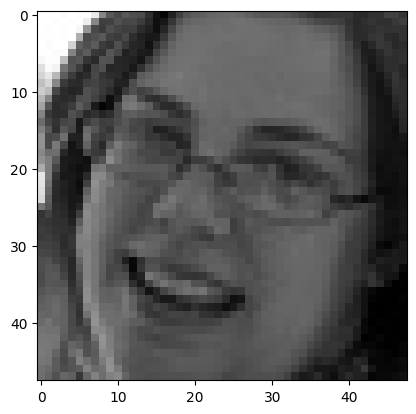

In [ ]:
plt.imshow(img_1)

# APPROACH 1 : OS MODULE UTILISATION : COMPUTATIONALLY COMPLEX

In [ ]:
# Creating Training directory variable

Train_directory = '/content/train'

In [ ]:
# Creating list of categories

Classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
Classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

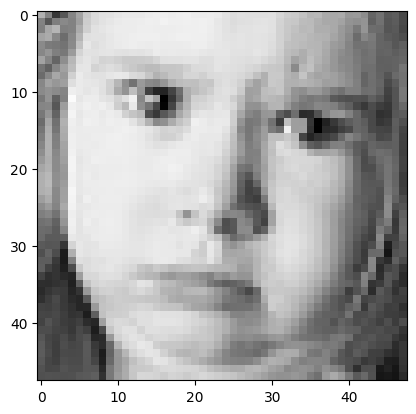

In [ ]:
# Looping through all images category wise

for category in Classes:
  # Make the path into each category directory inside training folder

  path = os.path.join(Train_directory,category)

  # Now inside the folder for each category list all the images in there

  for img in os.listdir(path):

    # Joining each image with the folder structure we get the full image path and we are passing it to get the array

    access_img_array = cv2.imread(os.path.join(path,img))

    # Visualising the image in RGB format

    plt.imshow(cv2.cvtColor(access_img_array,cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break


# Breaks used to only get the first iteration

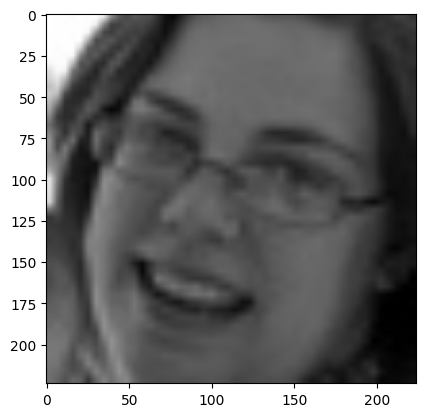

In [ ]:
# Change image size to fit into ImageNet parameters

IMAGE_SIZE = 224
new_image_array = cv2.resize(img_1,(IMAGE_SIZE,IMAGE_SIZE))
plt.imshow(cv2.cvtColor(new_image_array,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_image_array.shape

(224, 224, 3)

## Accessing all images and convert them into training array

In [ ]:
# Create the train list

TRAIN_DATA = []

def training_set_create():

  # Iterate over each category

  for category in Classes:

    # access each category folder in training

    path = os.path.join(Train_directory,category)

    # assign index number to each category

    classes_indexes = Classes.index(category)

    # access all image in each category and perform resize operation
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        img_array_resized = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
        TRAIN_DATA.append([img_array_resized,classes_indexes])
      except Exception as e:
        pass

In [ ]:
# Call the training function

training_set_create()

In [ ]:
len(TRAIN_DATA)

28709

In [ ]:
TRAIN_DATA[0]

[array([[[178, 178, 178],
         [178, 178, 178],
         [176, 176, 176],
         ...,
         [ 74,  74,  74],
         [ 73,  73,  73],
         [ 73,  73,  73]],
 
        [[178, 178, 178],
         [178, 178, 178],
         [176, 176, 176],
         ...,
         [ 74,  74,  74],
         [ 73,  73,  73],
         [ 73,  73,  73]],
 
        [[176, 176, 176],
         [176, 176, 176],
         [175, 175, 175],
         ...,
         [ 74,  74,  74],
         [ 73,  73,  73],
         [ 73,  73,  73]],
 
        ...,
 
        [[ 80,  80,  80],
         [ 80,  80,  80],
         [ 80,  80,  80],
         ...,
         [ 42,  42,  42],
         [ 43,  43,  43],
         [ 43,  43,  43]],
 
        [[ 80,  80,  80],
         [ 80,  80,  80],
         [ 80,  80,  80],
         ...,
         [ 42,  42,  42],
         [ 43,  43,  43],
         [ 43,  43,  43]],
 
        [[ 80,  80,  80],
         [ 80,  80,  80],
         [ 80,  80,  80],
         ...,
         [ 42,  42,  42],
  

In [ ]:
# Shuffle the data

import random

random.shuffle(TRAIN_DATA)

In [ ]:
# Convert TRAIN_DATA into array for model

TRAINING_ARRAY = np.array(TRAIN_DATA)
TRAINING_ARRAY.shape

<ipython-input-19-fc233f82d844>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  TRAINING_ARRAY = np.array(TRAIN_DATA)


(28709, 2)

## Creating Features and Target in Training data

In [ ]:
X = []   # image array data
Y = []   # labels data

for normalized_images,label in TRAIN_DATA:
  X.append(normalized_images)
  Y.append(label)

X = np.array(X).reshape(-1 ,IMAGE_SIZE ,IMAGE_SIZE ,3)   # Convert into 4 dimension (number of images , img_width, img_height , RGB_channel)

In [ ]:
X.shape

(28709, 224, 224, 3)

In [ ]:
Y

In [ ]:
X_reshape = (X/255.0).astype(np.int16) # <--- This is the suggestion

# APPROACH 2 : TENSORFLOW Data Directory API : COMPUTATIONALLY SIMPLE

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Model
import numpy as np

In [ ]:
# Using keras dataset -- Building Training partition

TRAIN_dataset = keras.utils.image_dataset_from_directory(
    '/content/train',
    labels = 'inferred',
    batch_size=32,
    image_size=(224, 224)
)

Found 28709 files belonging to 7 classes.


In [ ]:
len(TRAIN_dataset)

898

In [ ]:
# Creating the rescale layer

rescaling_layer = layers.experimental.preprocessing.Rescaling(1.0/255)

In [ ]:
# Function to normalize images batchwise

def normalize_batch(images, labels):
    normalized_images = rescaling_layer(images)
    return normalized_images, labels

In [ ]:
# Apply normalization to the dataset

normalized_dataset = TRAIN_dataset.map(normalize_batch)

In [ ]:
len(normalized_dataset)

898

In [ ]:
# Observing the scaled data

for images,labels in normalized_dataset.take(1):
  print(images.shape)
  print(labels.shape)

(32, 224, 224, 3)
(32,)


In [ ]:
# Using keras dataset -- Building Testing partition

TESTING_dataset = keras.utils.image_dataset_from_directory(
    '/content/test',
    labels = 'inferred',
    batch_size=32,
    image_size=(224, 224)
)

Found 7178 files belonging to 7 classes.


In [ ]:
# Checking length of TRAIN and TEST Partitions

print(f'Training set length : {len(normalized_dataset)}')
print(f'Testing set length : {len(TESTING_dataset)}')

Training set length : 898
Testing set length : 225


In [ ]:
# validation will be 20 % of training

TRAINING_dataset = normalized_dataset.take(800)
VALIDATION_dataset = TRAIN_dataset.skip(800)

In [ ]:
# Checking length of TRAIN and TEST and VALIDATION Partitions

print(f'Training set length : {len(TRAINING_dataset)}')
print(f'Testing set length : {len(TESTING_dataset)}')
print(f'Validation set length : {len(VALIDATION_dataset)}')

Training set length : 800
Testing set length : 225
Validation set length : 98


In [ ]:
# Rescaling Validation partition

# Apply normalization to the dataset

normalized_dataset_val = VALIDATION_dataset.map(normalize_batch)

## Creating the transfer learning network -- MobileNetV2

* MobileNet is a pre trained CNN model for images which we are going to utilise its tuned weights and biases for our classification.

* We will use the first layer of this model to pass our inputs and the pre-final layer to obtain values and parameters to pass to the dense layer we will be creating as per our categories

In [ ]:
# Declare the pretrained model

model = tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 0s 0us/step


In [ ]:
# Check model summary

model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
# Creating our entry and exit points

base_input = model.layers[0].input
base_output = model.layers[-2].output

In [ ]:
# Creating the fully connected layers

connected_layer_1 = layers.Dense(128,activation='relu')(base_output)
connected_layer_2 = layers.Dense(64,activation='relu')(connected_layer_1)
connected_layer_output = layers.Dense(7,activation = 'softmax')(connected_layer_2)

In [ ]:
connected_layer_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
# Creating the final model structure using functional API

main_model = keras.Model(inputs = base_input , outputs = connected_layer_output)
main_model

In [ ]:
main_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
# Compile the model

main_model.compile(loss = 'sparse_categorical_crossentropy' , optimizer ='adam' , metrics = ['accuracy'])

In [ ]:
# Fit the model

history = main_model.fit(
    TRAINING_dataset,
    batch_size=32,
    validation_data=VALIDATION_dataset,
    epochs =35,
)

Epoch 1/35
800/800 [==============================] - 165s 164ms/step - loss: 1.2391 - accuracy: 0.5330 - val_loss: 6.9265 - val_accuracy: 0.2473
Epoch 2/35
800/800 [==============================] - 133s 166ms/step - loss: 1.0732 - accuracy: 0.6014 - val_loss: 4.2588 - val_accuracy: 0.1853
Epoch 3/35
800/800 [==============================] - 133s 166ms/step - loss: 0.9941 - accuracy: 0.6277 - val_loss: 2.6306 - val_accuracy: 0.2464
Epoch 4/35
800/800 [==============================] - 133s 166ms/step - loss: 0.9355 - accuracy: 0.6530 - val_loss: 6.8736 - val_accuracy: 0.1769
Epoch 5/35
800/800 [==============================] - 134s 168ms/step - loss: 0.8799 - accuracy: 0.6732 - val_loss: 2.1932 - val_accuracy: 0.2432
Epoch 6/35
800/800 [==============================] - 132s 165ms/step - loss: 0.8231 - accuracy: 0.6915 - val_loss: 1.9172 - val_accuracy: 0.2441
Epoch 7/35
800/800 [==============================] - 132s 165ms/step - loss: 0.7676 - accuracy: 0.7163 - val_loss: 2.4881 -

In [ ]:
# Save the model for further use

main_model.save('image_analysis_model.h5')
files.download('image_analysis_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>